## **LGM-VIP Data Science Internship Programme**

**Beginner Level Task-2 : Stock Market Prediction And Forecasting Using Stacked LSTM**

**Author : S Sreevatsav**

**Dataset Link : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv**

**Language : Python**


###**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

###**Loading Dataset**


In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
dataset=dataset.iloc[::-1].set_index(dataset.index)
dataset.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
5,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
6,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
7,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
8,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
9,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78


In [3]:
dataset.tail(22)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2013,2018-08-28,237.00,239.30,231.30,232.90,233.35,2374782,5571.77
2014,2018-08-29,233.85,237.70,232.70,234.20,234.55,1394661,3280.33
2015,2018-08-30,235.35,237.30,232.10,237.30,236.00,1921327,4516.57
2016,2018-08-31,237.00,239.75,232.95,234.65,234.30,3353833,7913.21
2017,2018-09-03,236.00,243.55,235.05,236.85,236.70,5242852,12538.39
2018,2018-09-04,238.20,238.20,222.60,223.45,223.70,3554859,8163.82
2019,2018-09-05,222.00,224.60,215.20,222.10,222.40,3023097,6674.93
2020,2018-09-06,224.00,225.00,218.20,220.95,221.05,1738824,3856.72
2021,2018-09-07,221.00,224.50,219.10,223.15,222.95,1232507,2742.84
2022,2018-09-10,222.50,235.15,220.65,221.05,222.00,7514106,17130.29


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
dataset_training = dataset[:2013:]
dataset_training

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2008,2018-08-20,244.0,247.00,243.00,244.70,245.15,1690225,4141.83
2009,2018-08-21,246.9,246.90,239.25,240.90,240.55,3272005,7941.40
2010,2018-08-23,240.3,240.60,233.10,235.50,235.45,1553953,3662.36
2011,2018-08-24,234.5,237.20,230.20,231.50,231.00,1838417,4289.35


In [6]:
dataset_test = dataset[2013::]
dataset_test

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2013,2018-08-28,237.00,239.30,231.30,232.90,233.35,2374782,5571.77
2014,2018-08-29,233.85,237.70,232.70,234.20,234.55,1394661,3280.33
2015,2018-08-30,235.35,237.30,232.10,237.30,236.00,1921327,4516.57
2016,2018-08-31,237.00,239.75,232.95,234.65,234.30,3353833,7913.21
2017,2018-09-03,236.00,243.55,235.05,236.85,236.70,5242852,12538.39
2018,2018-09-04,238.20,238.20,222.60,223.45,223.70,3554859,8163.82
2019,2018-09-05,222.00,224.60,215.20,222.10,222.40,3023097,6674.93
2020,2018-09-06,224.00,225.00,218.20,220.95,221.05,1738824,3856.72
2021,2018-09-07,221.00,224.50,219.10,223.15,222.95,1232507,2742.84
2022,2018-09-10,222.50,235.15,220.65,221.05,222.00,7514106,17130.29


In [7]:
dataset.shape

(2035, 8)

In [8]:
dataset_training.shape

(2013, 8)

In [9]:
dataset_test.shape

(22, 8)

###**Visualization**

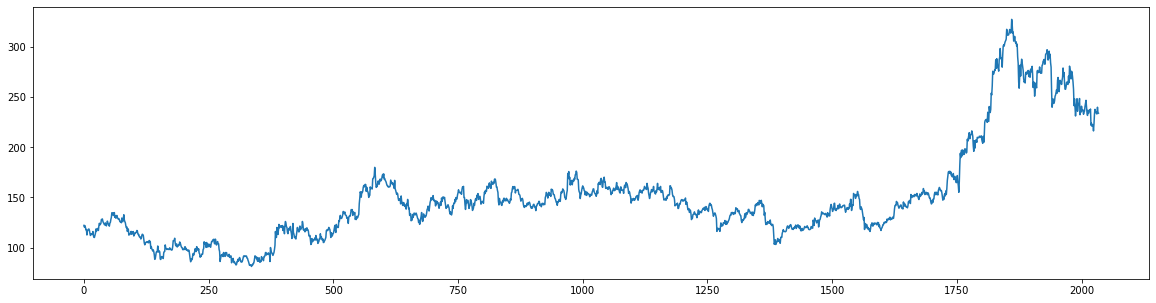

In [10]:
plt.figure(figsize=(20,5))
plt.plot(dataset['Open'])
plt.show()

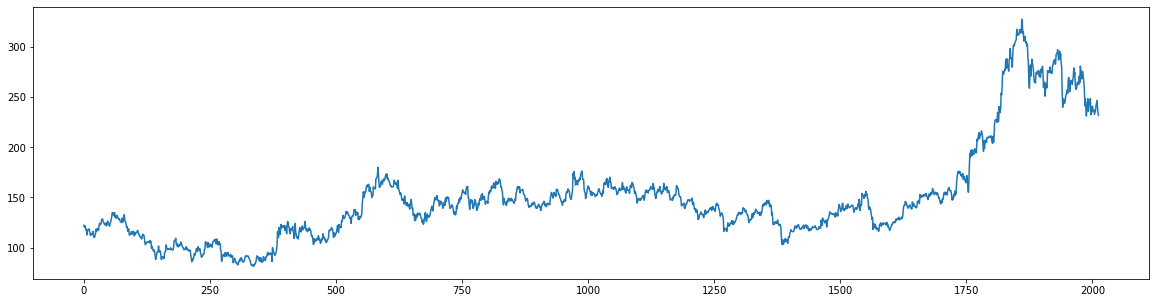

In [11]:
plt.figure(figsize=(20,5))
plt.plot(dataset_training['Open'])
plt.show()

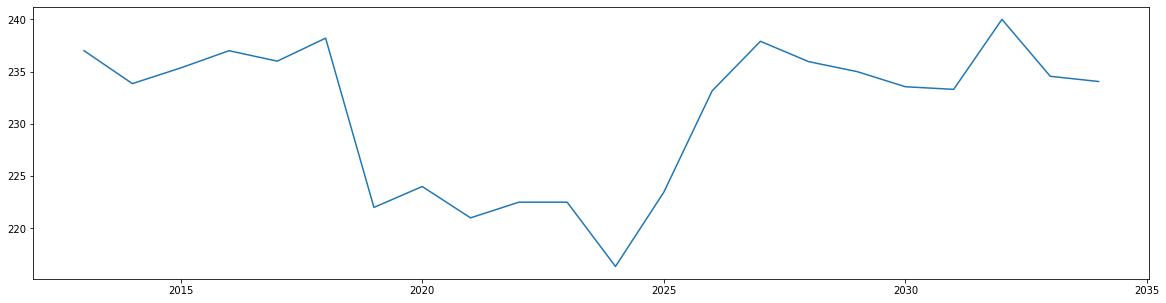

In [12]:
plt.figure(figsize=(20,5))
plt.plot(dataset_test['Open'])
plt.show()

###**Splitting and Feature Scaling of Dataset**

In [13]:
training_set=dataset_training.iloc[:,1:2].values
training_set

array([[122.1],
       [120.3],
       [121.8],
       ...,
       [240.3],
       [234.5],
       [231.8]])

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.16626115],
       [0.15896188],
       [0.16504461],
       ...,
       [0.64557989],
       [0.62206002],
       [0.61111111]])

In [15]:
X_train=[]
Y_train=[]
for i in range(80,2013):
  X_train.append(training_set_scaled[i-80:i,0])
  Y_train.append(training_set_scaled[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)
X_train.shape

(1933, 80)

In [16]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train

array([[[0.16626115],
        [0.15896188],
        [0.16504461],
        ...,
        [0.18207624],
        [0.18106245],
        [0.19424169]],

       [[0.15896188],
        [0.16504461],
        [0.15815085],
        ...,
        [0.18106245],
        [0.19424169],
        [0.20924574]],

       [[0.16504461],
        [0.15815085],
        [0.14801298],
        ...,
        [0.19424169],
        [0.20924574],
        [0.18815896]],

       ...,

       [[0.86293593],
        [0.87712895],
        [0.85827251],
        ...,
        [0.64760746],
        [0.66058394],
        [0.67234388]],

       [[0.87712895],
        [0.85827251],
        [0.83515815],
        ...,
        [0.66058394],
        [0.67234388],
        [0.64557989]],

       [[0.85827251],
        [0.83515815],
        [0.84225466],
        ...,
        [0.67234388],
        [0.64557989],
        [0.62206002]]])

###**Training of Model**

In [17]:
model = Sequential()

In [18]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [20]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=70,batch_size=30)

Epoch 1/70
65/65 [==============================] - 17s 148ms/step - loss: 0.0108 - accuracy: 0.0010
Epoch 2/70
65/65 [==============================] - 10s 146ms/step - loss: 0.0019 - accuracy: 0.0010
Epoch 3/70
65/65 [==============================] - 9s 146ms/step - loss: 0.0018 - accuracy: 0.0010
Epoch 4/70
65/65 [==============================] - 10s 147ms/step - loss: 0.0016 - accuracy: 0.0010
Epoch 5/70
65/65 [==============================] - 9s 145ms/step - loss: 0.0018 - accuracy: 0.0010
Epoch 6/70
65/65 [==============================] - 10s 146ms/step - loss: 0.0012 - accuracy: 0.0010
Epoch 7/70
65/65 [==============================] - 10s 147ms/step - loss: 0.0014 - accuracy: 0.0010
Epoch 8/70
65/65 [==============================] - 10s 146ms/step - loss: 0.0014 - accuracy: 0.0010
Epoch 9/70
65/65 [==============================] - 9s 145ms/step - loss: 0.0012 - accuracy: 0.0010
Epoch 10/70
65/65 [==============================] - 9s 146ms/step - loss: 0.0010 - accuracy: 

###**Testing Model**

In [21]:
testing_data=dataset['Open'][len(dataset)-len(dataset_test)-80:].values
testing_data = testing_data.reshape(-1,1)
testing_data=sc.transform(testing_data)
X_test=[]
for i in range(80,102):
  X_test.append(testing_data[i-80:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
stock_price_pred=model.predict(X_test)
stock_price_pred=sc.inverse_transform(stock_price_pred)
real_stock_price=dataset_test.iloc[:,1].values

###**Visualization of the Prediction by the Model**

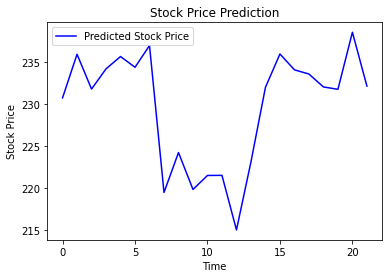

In [22]:
plt.plot(stock_price_pred,color='blue',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

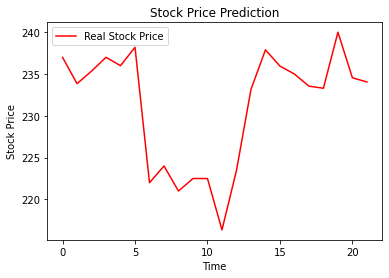

In [23]:
plt.plot(real_stock_price,color='red',label='Real Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

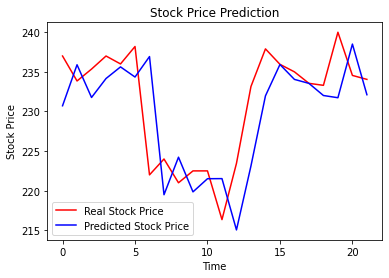

In [24]:
plt.plot(real_stock_price,color='red',label='Real Stock Price')
plt.plot(stock_price_pred,color='blue',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [25]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, stock_price_pred))
rmse

5.495543149279256